测试tensorflow中的tf.rand_crop函数是否可以同时剪裁原始图像和标注图像

In [1]:
import tensorflow as tf 
import random 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
dir_data = '/home/ye/zhouhua/datasets/dataset1/images_prepped_train/0001TP_006690.png' 
dir_label = '/home/ye/zhouhua/datasets/dataset1/annotations_prepped_train/0001TP_006690.png'

In [3]:
from PIL import Image

img = Image.open(dir_data)
label = Image.open(dir_label)

img = np.array(img)
label = np.array(label)





In [6]:
print(img.shape, label.shape)
print(np.max(label), np.min(label))

(360, 480, 3) (360, 480)
11 0


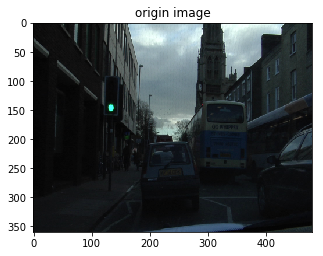

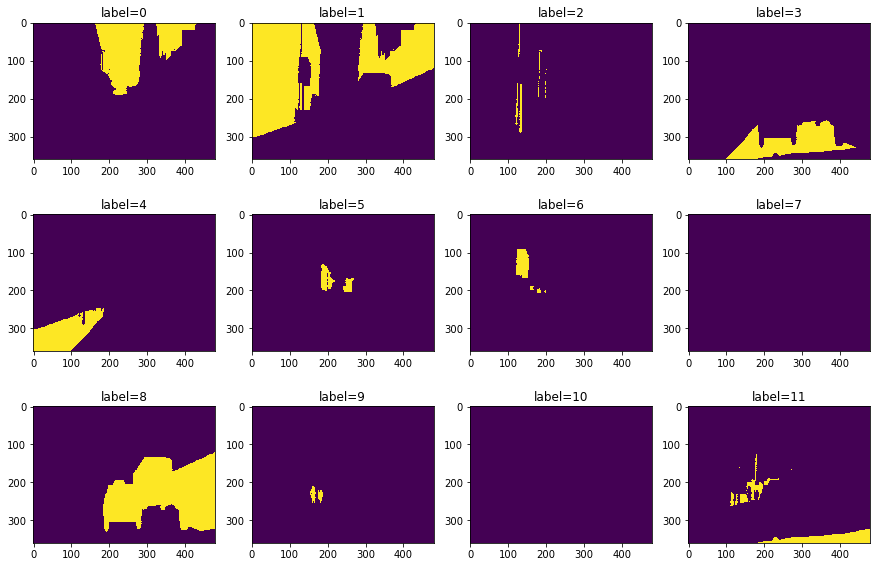

In [13]:
min, max = np.min(label),np.max(label)
classes = max-min+1
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.set_title("origin image")
plt.show()

fig = plt.figure(figsize=(15,10))
for i in range(classes):
    ax = fig.add_subplot(3, 4, i+1)  # 第i+1个图
    ax.imshow((label==i)*1.0)
    ax.set_title("label={}".format(i))
plt.show()



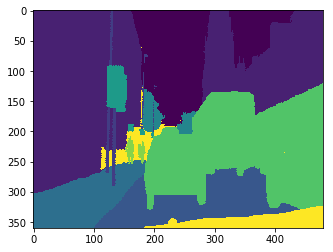

In [14]:
plt.imshow(label)
plt.show()

使用PIL中Image读取label时读取到的shape为360 480，像素的值就是类别，如果使用cv2读取的结果会是如何呢？

(360, 480, 3) 0 11


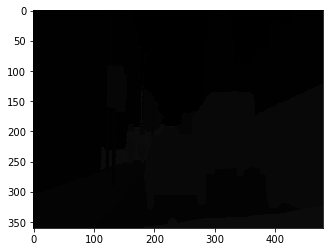

In [15]:
import cv2
test_label = cv2.imread(dir_label)
print(test_label.shape, np.min(test_label), np.max(test_label))
plt.imshow(test_label)
plt.show()

使用cv2读取到的就是3个维度的彩色图像了，也无法直接使用plt显示了，需要对其进行转换。

In [39]:
img_crop = tf.random_crop(img, (224,224,3) )
label_crop = tf.random_crop(label, (224,224))

In [40]:
print(img_crop.shape, label_crop.shape, type(img_crop), type(label_crop))

(224, 224, 3) (224, 224) <class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'>


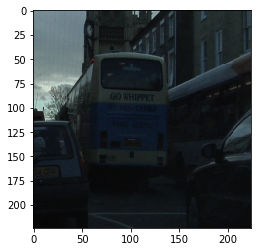

In [41]:
sess = tf.InteractiveSession()
img_crop_finish = sess.run(img_crop)
plt.imshow(img_crop_finish)
plt.show()


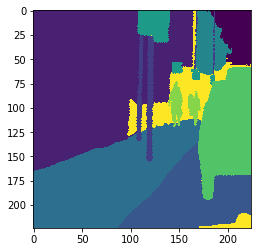

In [42]:
label_crop_finish = sess.run(label_crop)
plt.imshow(label_crop_finish)
plt.show()